# Stock market sectors

You'll often see stocks broken down by the type of business they're in. The basic categories most often used include:

Communication Services -- telephone, internet, media, and entertainment companies

Consumer Discretionary -- retailers, automakers, and hotel and restaurant companies

Consumer Staples -- food, beverage, tobacco, and household and personal products companies

Energy -- oil and gas exploration and production companies, pipeline providers, and gas station operators

Financial -- banks, mortgage finance specialists, and insurance and brokerage companies

Healthcare -- health insurers, drug and biotech companies, and medical device makers

Industrial -- airline, aerospace and defense, construction, logistics, machinery, and railroad companies

Materials -- mining, forest products, construction materials, packaging, and chemical companies

Real Estate -- real estate investment trusts and real estate management and development companies

Technology -- hardware, software, semiconductor, communications equipment, and IT services companies

Utilities -- electric, natural gas, water, renewable energy, and multi-product utility companies

# The stock we may use
Select sp500(^GSPC) as a base line to compare with other category of stock

Select apple stock to present tech stock

Select bac stock to present financial stock

Select ual stock to present industrial stock

Select cake stock to present consumer discretionary

In [65]:
'''
Import all libraries we will use later
'''
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


In [66]:
'''
Use Data Reader from pandas to catch all stock data we need. 
'''
# stock_code = input()

# S&P500 present a base line to compare with other stock. 
sp500_df = DataReader('^GSPC', 'yahoo', start, end)
sp500_df["company_name"] = 'sp500'

# The tech stocks we'll use for this analysis
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['AAPL']
# if stock_code not in all_list:
#     all_list.append(stock_code)

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
    globals()[stock]["company_name"] = stock

# all_stock_df = pd.read_csv('data/all_stocks_5yr.csv')
# Amazon_df = pd.read_csv('data/Amazon_Historical_StockPrice.csv')
all_list = [sp500_df, AAPL]

In [67]:
'''
Check and show dataframe
'''
all_df = pd.concat(all_list, axis=0)
all_df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-03-31,2641.389893,2571.149902,2614.689941,2584.590088,6.568290e+09,2584.590088,sp500
2020-04-01,2522.750000,2447.489990,2498.080078,2470.500000,5.947900e+09,2470.500000,sp500
2020-04-02,2533.219971,2455.790039,2458.540039,2526.899902,6.454990e+09,2526.899902,sp500
2020-04-03,2538.179932,2459.959961,2514.919922,2488.649902,6.087190e+09,2488.649902,sp500
2020-04-06,2676.850098,2574.570068,2578.280029,2663.679932,6.391860e+09,2663.679932,sp500


In [68]:
'''
Clean useless data and bias
'''
print(tech_df.isnull().any())
print(tech_df[tech_df.isnull().values==True])
tech_df.fillna(0,inplace=True)
print(tech_df[tech_df.duplicated(keep=False)])

High            False
Low             False
Open            False
Close           False
Volume          False
Adj Close       False
company_name    False
dtype: bool
Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close, company_name]
Index: []
Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close, company_name]
Index: []


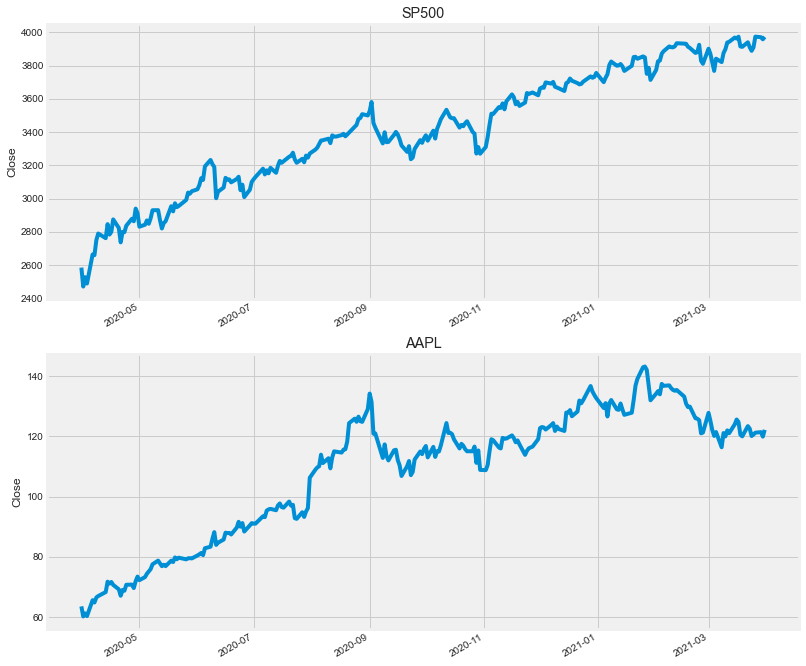

In [69]:
'''
Look at the trend of stock
'''
# plt.figure(figsize=(16,8))
# plt.title('S&P500 Close Price History')
# plt.plot(sp500_df['Close'])
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('S&P500 Close Price USD ($)', fontsize=18)
# plt.show()

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(all_list, 1):
    plt.subplot(2, 1, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{['SP500', 'AAPL'][i - 1]}")

In [70]:
# '''
# Look at the trend of stock
# '''
# plt.figure(figsize=(16,8))
# plt.title('S&P500 Close Price History')
# plt.plot(AAPL['Close'])
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('S&P500 Close Price USD ($)', fontsize=18)
# plt.show()

In [71]:
'''
Use close price of stock to do the analysis. Split train and test data. 
'''
# Create a new dataframe with only the 'Close column 
data = AAPL.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
# Get the number of rows to train the model on
# train, test = train_test_split(dataset, test_size=0.2)
# train_data = train[0:len(train), 0]
# test_data = test[0:len(train), 0]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :][0:len(scaled_data), 0]

In [72]:
'''
Split x and y from train
'''
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
#     if i<= 61:
#         print(x_train)
#         print(y_train)
#         print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [73]:
'''
Train model
'''
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

181/181 [==============================] - 6s 22ms/step - loss: 0.0355


In [74]:
'''
Split x and y from test and check accuracy
'''
# scaler = MinMaxScaler(feature_range=(0,1))
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
# test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :][0:len(scaled_data), 0]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
# temp = round(60/len(train_data) * len(test_data))
for i in range(60, len(test_data)):
#     x_test.append(test_data[i-temp:i])
    x_test.append(test_data[i-60:i])
#     y_test.append(test_data[i])
#     if i<= temp:
#         print(x_test)
#         print(y_test)
#         print()
    
# Convert the data to a numpy array
# x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.1133664898685525

<ipython-input-75-473f12ddd66a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


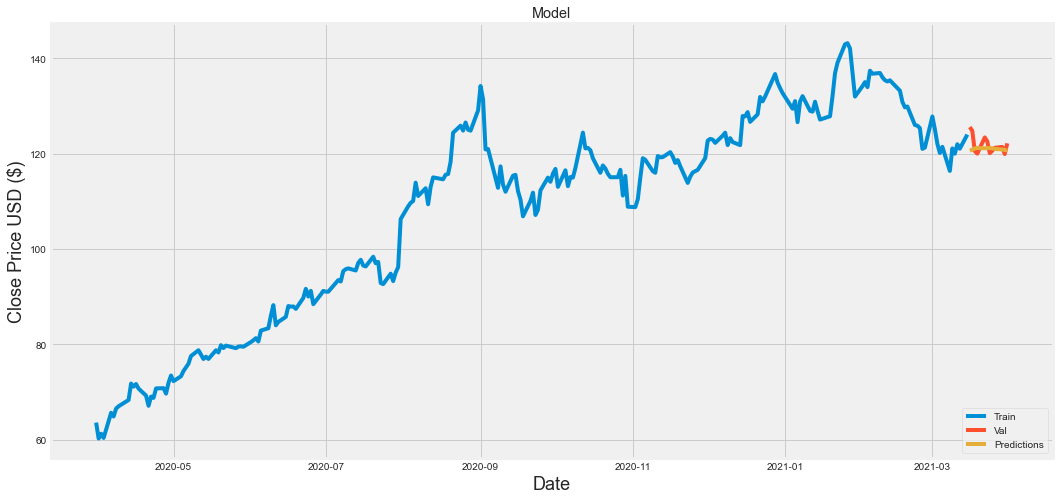

In [75]:
'''
Visiualize the model trained
'''
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()